In [43]:
import pandas as pd
import numpy as np


<AxesSubplot:>

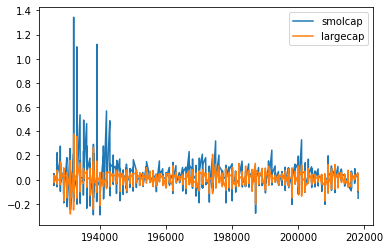

In [46]:
#dataset
me_m = pd.read_csv("./data/Portfolios_Formed_on_ME_monthly_EW.csv",
                     header=0,
                     index_col=0,
                     parse_dates=True,
                     na_values=-99.99
                     )
cols = ["Lo 10", "Hi 10"]
returns = me_m[cols]
returns.columns = ["smolcap", "largecap"]
returns = returns/100
returns.plot()

In [47]:
returns.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

In [48]:
returns.index = pd.to_datetime(returns.index,
                               format="%Y%m").to_period('M')

# Compute Drawdowns

1. Compute a wealth index
2. Compute previous peaks
3. Compute drawdown as percentage

In [51]:
wealth_index = 1000*(1+returns["largecap"]).cumprod()
wealth_index.head()

1926-07    1032.900000
1926-08    1071.117300
1926-09    1078.293786
1926-10    1052.091247
1926-11    1080.497711
Freq: M, Name: largecap, dtype: float64

<AxesSubplot:>

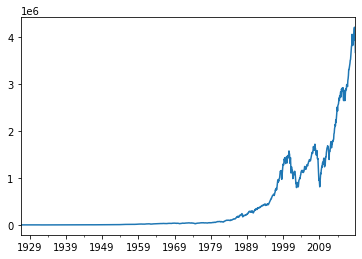

In [52]:
wealth_index.plot()

<AxesSubplot:>

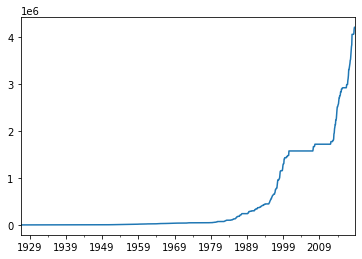

In [53]:
previous_peaks = wealth_index.cummax()
previous_peaks.plot()

<AxesSubplot:>

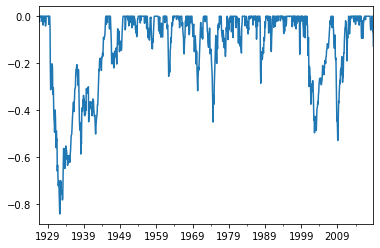

In [55]:
drawdown = (wealth_index - previous_peaks)/previous_peaks
drawdown.plot()

In [56]:
type(drawdown)

pandas.core.series.Series

In [57]:
drawdown.min()

-0.8400375277943123

### Keep in mind drawdown itself is a time-series

In [58]:
drawdown["1975":].min()

-0.5280945042309304

In [59]:
drawdown["1975":].idxmin()

Period('2009-02', 'M')

In [60]:
def drawdown(return_series: pd.Series):
    """"
    Takes a time series of asset returns
    Computes and returns a DataFrame that contains:
    the wealth index
    the previous peaks
    percent drawdowns
    """
    
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index-previous_peaks)/previous_peaks
    return pd.DataFrame({
        "Wealth": wealth_index,
        "Peaks" : previous_peaks,
        "Drawdown": drawdowns
    })


In [61]:
drawdown(returns["largecap"]).head()

,Wealth,Peaks,Drawdown
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000


<AxesSubplot:>

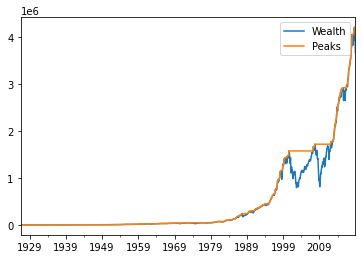

In [64]:
largecap_dd = drawdown(returns["largecap"])[["Wealth", "Peaks"]]
largecap_dd.plot()

<AxesSubplot:>

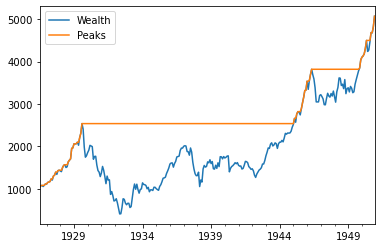

In [66]:
#up to 1950 drawdown
drawdown(returns[:"1950"]["largecap"])[["Wealth", "Peaks"]].plot()

In [69]:
#smallcap portfolio 
drawdown(returns["smolcap"])["Drawdown"].idxmin()

Period('1932-05', 'M')

In [70]:
#drawdowns post big 1932 drop
drawdown(returns["1940":]["smolcap"])["Drawdown"].idxmin()

Period('1974-12', 'M')